In [76]:
import numpy as np
import pickle
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import scipy.stats as stat
import matplotlib.pyplot as plt
from matplotlib import cm
viridis = cm.get_cmap('viridis', 8)


C:\Users\12RAM\AppData\Local\Temp\ipykernel_19936\2154581733.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 8)


In [ ]:
# This file makes the plots for the manuscript
# below gets the vector of SEs for the private PD median
def get_mses(d,f1,f2,tt):
    fn_mm=f1+str(d)+f2
    with open(fn_mm,"rb") as file:
        results_mm=pickle.load(file)
    ### 
    x_pdmm_norm=[]
    for i in tqdm(results_mm):
        x_pdmm,x_npdmm,x,x2,cpm = i
        # PD
        x_pdmm=  np.array([x.get() for x in x_pdmm])
        x_pdmm_norm=x_pdmm_norm+[np.linalg.norm(x_pdmm[x_pdmm.shape[0]-1,:])**2]
    x_pdmm_norm=np.array(x_pdmm_norm)
    return x_pdmm_norm


In [ ]:
# get all the MSES, this is kind of inefficient but oh well

mses_2_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')
mses_2_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')
mses_2_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_","_small_eps.pickle",'clean')

mses_5_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')
mses_5_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')
mses_5_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_","_med_eps.pickle",'clean')

mses_10_2=get_mses(2,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')
mses_10_10=get_mses(10,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')
mses_10_20=get_mses(20,"output/delta_med_mad_results_clean_dimension_",".pickle",'clean')

# print(mses_2)
# print(mses_5)
# mses_10


100%|██████████| 50/50 [00:03<00:00, 14.59it/s]


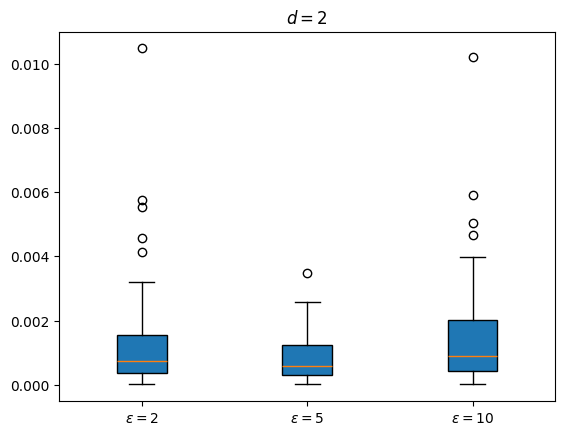

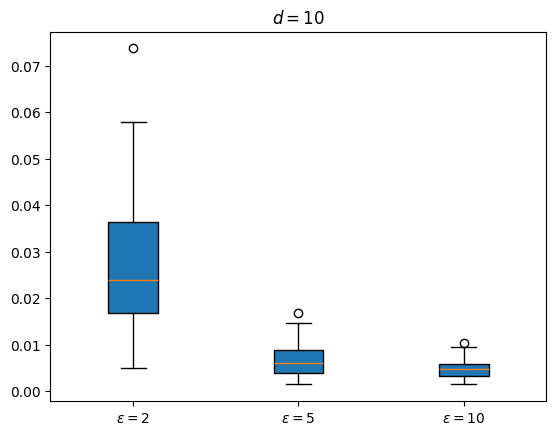

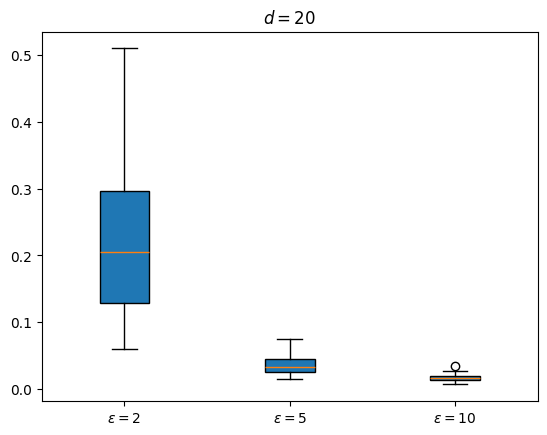

In [ ]:

# plot 3 boxplots together from lists, also lazy but it works 
def plot_three_boxplots(list1, list2, list3, labels=None, title=None, fname='test.png'):
    data = [list1, list2, list3]
    if labels is None:
        labels = ["List 1", "List 2", "List 3"]

    fig, ax = plt.subplots()
    ax.boxplot(data, labels=labels, patch_artist=True)  
    if title:
        ax.set_title(title)
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()


lab=[r'$\epsilon = 2$',r'$\epsilon = 5$', r'$\epsilon = 10$']
plot_three_boxplots(mses_2_2, mses_5_2,mses_10_2, labels=lab, title=r'$d = 2$',fname='d_2.png')
plot_three_boxplots(mses_2_10, mses_5_10,mses_10_10, labels=lab, title=r'$d = 10$',fname='d_10.png')
plot_three_boxplots(mses_2_20, mses_5_20,mses_10_20, labels=lab, title=r'$d = 20$',fname='d_20.png')

In [ ]:
# do same for con
mses_2_2=get_mses(2,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')
mses_2_10=get_mses(10,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')
mses_2_20=get_mses(20,"output/delta_med_mad_results_con_dimension_","_small_eps.pickle",'con')

mses_5_2=get_mses(2,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')
mses_5_10=get_mses(10,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')
mses_5_20=get_mses(20,"output/delta_med_mad_results_con_dimension_","_med_eps.pickle",'con')

mses_10_2=get_mses(2,"output/delta_med_mad_results_con_dimension_",".pickle",'con')
mses_10_10=get_mses(10,"output/delta_med_mad_results_con_dimension_",".pickle",'con')
mses_10_20=get_mses(20,"output/delta_med_mad_results_con_dimension_",".pickle",'con')



100%|██████████| 50/50 [00:02<00:00, 17.20it/s]


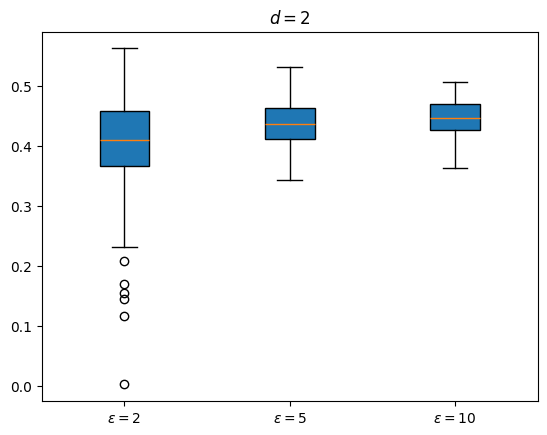

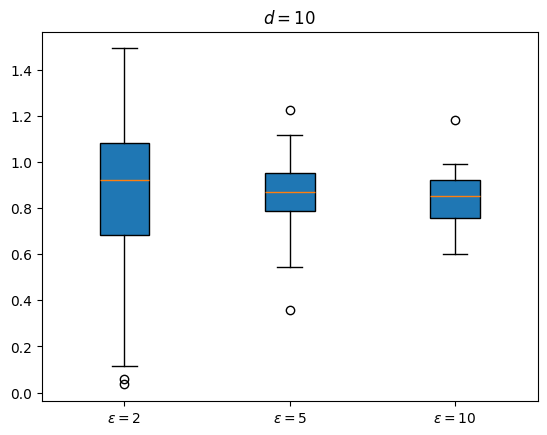

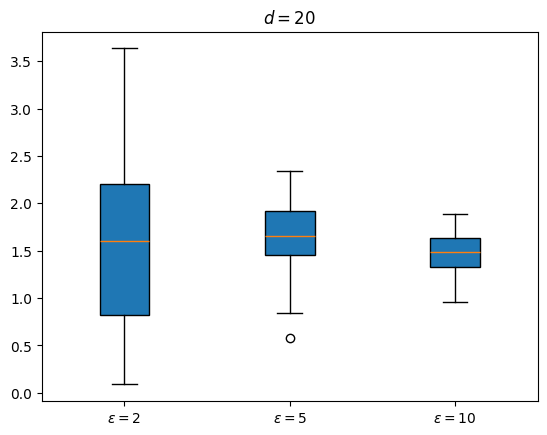

In [ ]:
lab=[r'$\epsilon = 2$',r'$\epsilon = 5$', r'$\epsilon = 10$']
plot_three_boxplots(mses_2_2, mses_5_2,mses_10_2, labels=lab, title=r'$d = 2$',fname='con_d_2.png')
plot_three_boxplots(mses_2_10, mses_5_10,mses_10_10, labels=lab, title=r'$d = 10$',fname='con_d_10.png')
plot_three_boxplots(mses_2_20, mses_5_20,mses_10_20, labels=lab, title=r'$d = 20$',fname='con_d_20.png')

In [ ]:
# get trimmed MSE for all estimates
def get_mse(d,f1,f2,tt):
    fn_mm=f1+str(d)+f2
    with open(fn_mm,"rb") as file:
        results_mm=pickle.load(file)
    ### 
    x_pdmm_norm=[]
    x_npdmm_norm=[]
    # Other medians /means
    x_p_mse=[]
    x_np_mse=[]
    x_cp_mse=[]
    for i in tqdm(results_mm):
        x_pdmm,x_npdmm,x_p,x_np,x_cp = i
        # PD
        x_pdmm=  np.array([x.get() for x in x_pdmm])
        x_npdmm = np.array([x.get() for x in x_npdmm])
        x_pdmm_norm=x_pdmm_norm+[np.linalg.norm(x_pdmm[x_pdmm.shape[0]-1,:])**2]
        x_npdmm_norm=x_npdmm_norm+[np.linalg.norm(x_npdmm[x_npdmm.shape[0]-1,:])**2]
        # Other
        x_p = np.array(x_p)
        x_np = np.array(x_np)
        x_cp = np.array(x_cp)
        
        x_p_mse=x_p_mse+[np.linalg.norm(x_p[x_p.shape[0]-1,:])**2]
        x_np_mse=x_np_mse+[np.linalg.norm(x_np[x_np.shape[0]-1,:])**2]
        x_cp_mse=x_cp_mse+[np.linalg.norm(x_cp)**2]
    x_pdmm_norm=np.array(x_pdmm_norm)
    x_npdmm_norm=np.array(x_npdmm_norm)
    x_pdmm_mse=stat.trim_mean(x_pdmm_norm,0.1)
    x_npdmm_mse=stat.trim_mean(x_npdmm_norm,0.1)
    # Others
    x_p_mse=np.array(x_p_mse)
    # x_np_mse=np.array(x_np_mse)
    x_cp_mse=np.array(x_cp_mse)
    x_p_mse=stat.trim_mean(x_p_mse,0.1)
    # x_np_mse=stat.trim_mean(x_np_mse,0.1)
    x_cp_mse=stat.trim_mean(x_cp_mse,0.1)

    fn_m="output/sm_results_"+tt+"_dimension_"+str(d)+".pickle"
    with open(fn_m,"rb") as file:
        results_mean=pickle.load(file)
    x_npm_mse=stat.trim_mean(np.apply_along_axis(np.linalg.norm, 1, results_mean)**2,0.1)
    
    return x_pdmm_mse,x_npdmm_mse,  x_p_mse, x_cp_mse, x_npm_mse


In [ ]:
# initialize 
dimensions=[2,10,20]
rows=[]


In [ ]:
# make list of dictionaries for all runs of the simulation and parameter combos
typpe='clean'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### clean, eps=2 

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_small_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())

#### clean, eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_med_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())


#### clean, eps=10
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=10

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_",".pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())

100%|██████████| 50/50 [00:03<00:00, 16.27it/s]


In [92]:

typpe='con'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### clean, eps=2 

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_small_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())

#### clean, eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_","_med_eps.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())


#### clean, eps=10
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=10

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_"+typpe+"_dimension_",".pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())

100%|██████████| 50/50 [00:03<00:00, 14.57it/s]


In [105]:
typpe='heavy'

t_pm={'MSE': np.nan, 'Estimator':'Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npm={'MSE': np.nan, 'Estimator':'Non-Priv. PD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_sidd={'MSE': np.nan, 'Estimator':'Priv. s-IDD Median', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_cp={'MSE': np.nan, 'Estimator':'Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}
t_npmean={'MSE': np.nan, 'Estimator':'Non-Priv. Mean', r'$\epsilon$':2,'Dist':typpe,r'$d$':2}

#### heavy  eps=5
t_pm[r'$\epsilon$']=t_npm[r'$\epsilon$']=t_sidd[r'$\epsilon$']=t_cp[r'$\epsilon$']=t_npmean[r'$\epsilon$']=5

for d in dimensions:
    pm,npm,sidd,cp,npmean=get_mse(d,"output/delta_med_mad_results_clean_dimension_","_med_eps_heavy.pickle",typpe)
    t_pm[r'$d$']=t_npm[r'$d$']=t_sidd[r'$d$']=t_cp[r'$d$']=t_npmean[r'$d$']=d
    t_pm['MSE']=pm
    t_npm['MSE']=npm
    t_sidd['MSE']=sidd
    t_cp['MSE']=cp
    t_npmean['MSE']=npmean
    rows.append(t_pm.copy())
    rows.append(t_npm.copy())
    rows.append(t_sidd.copy())
    rows.append(t_cp.copy())
    rows.append(t_npmean.copy())


100%|██████████| 50/50 [00:08<00:00,  6.09it/s]


In [106]:
mse_df=pd.DataFrame(rows)
print(mse_df.shape)
mse_df.head()

(105, 5)


,MSE,Estimator,$\epsilon$,Dist,$d$
0,0.000960,Priv. PD Median,2,clean,2
1,0.000216,Non-Priv. PD Median,2,clean,2
2,0.000800,Priv. s-IDD Median,2,clean,2
3,0.000053,Priv. Mean,2,clean,2
4,0.000161,Non-Priv. Mean,2,clean,2


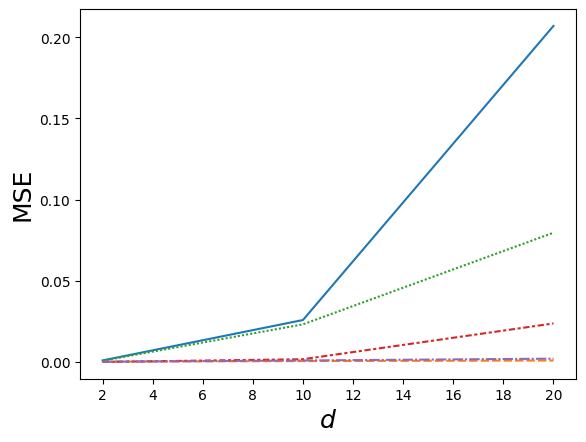

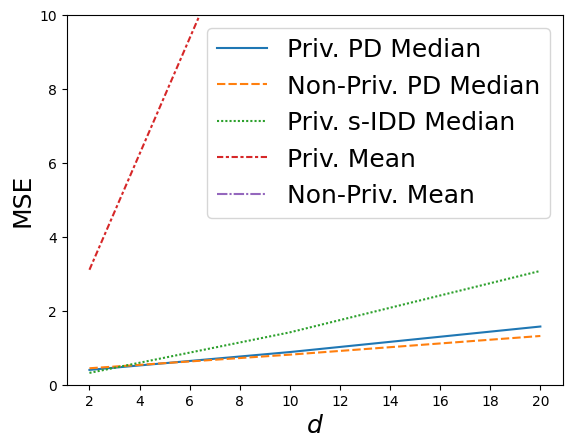

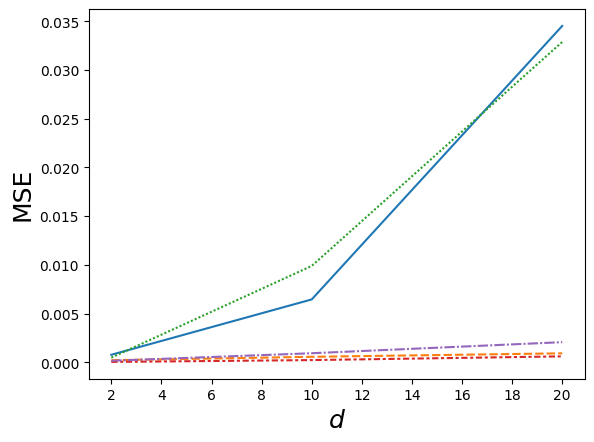

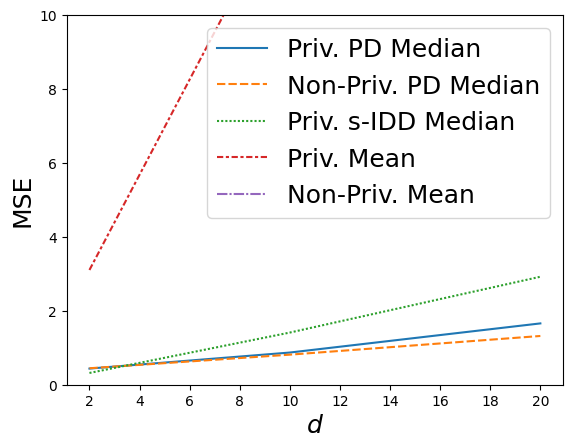

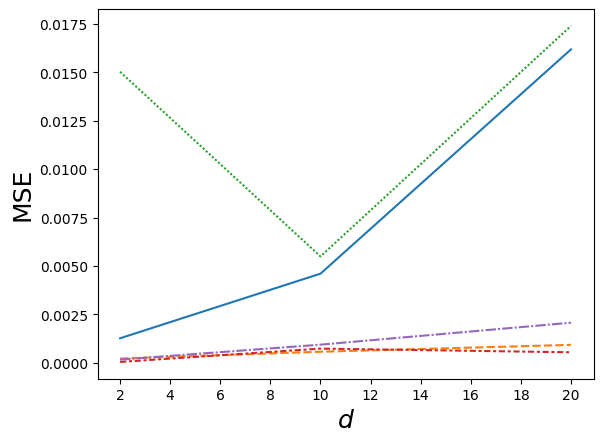

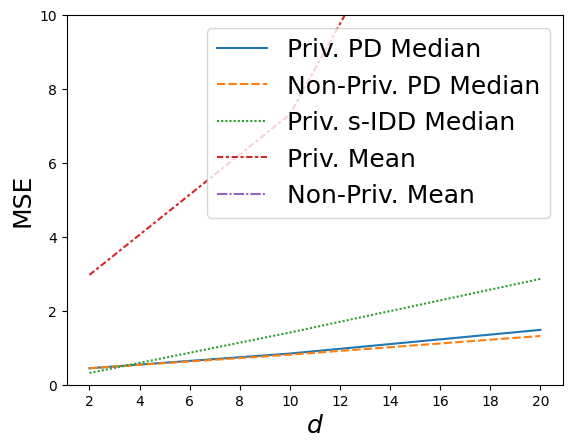

In [100]:
def make_plots(eps):
    ax = sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==eps) & (mse_df['Dist']=='clean')],
                x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
    # ax.set_ylim(0,0.2)
    leg = ax.get_legend()
    leg.set_visible(False)
    ax.set_xlabel( r'$d$',fontsize=18)
    ax.set_ylabel("MSE" ,fontsize=18)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fname="CLEAN_Trimmed_MSE_"+str(eps)+".png"
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()

    ax=sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==eps) & (mse_df['Dist']=='con')],x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
    ax.set_ylim(0,10)

    ax.legend(loc='upper right',fontsize=18)
    ax.set_xlabel( r'$d$',fontsize=18)
    ax.set_ylabel("MSE" ,fontsize=18)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    fname="CON_Trimmed_MSE_Eps_"+str(eps)+".png"
    plt.savefig(fname,dpi=600, bbox_inches='tight')
    plt.show()
make_plots(2)
make_plots(5)
make_plots(10)

# 

In [101]:
mse_df[(mse_df['$\\epsilon$']==2) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]


,MSE,Estimator,$\epsilon$,Dist,$d$
45,0.401173,Priv. PD Median,2,con,2
50,0.883935,Priv. PD Median,2,con,10
55,1.574583,Priv. PD Median,2,con,20


In [102]:
mse_df[(mse_df['$\\epsilon$']==10) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]

,MSE,Estimator,$\epsilon$,Dist,$d$
75,0.445295,Priv. PD Median,10,con,2
80,0.843556,Priv. PD Median,10,con,10
85,1.483974,Priv. PD Median,10,con,20


In [103]:
mse_df[(mse_df['$\\epsilon$']==5) & (mse_df['Dist']=='con')& (mse_df['Estimator']=='Priv. PD Median')]


,MSE,Estimator,$\epsilon$,Dist,$d$
60,0.436869,Priv. PD Median,5,con,2
65,0.870671,Priv. PD Median,5,con,10
70,1.659030,Priv. PD Median,5,con,20


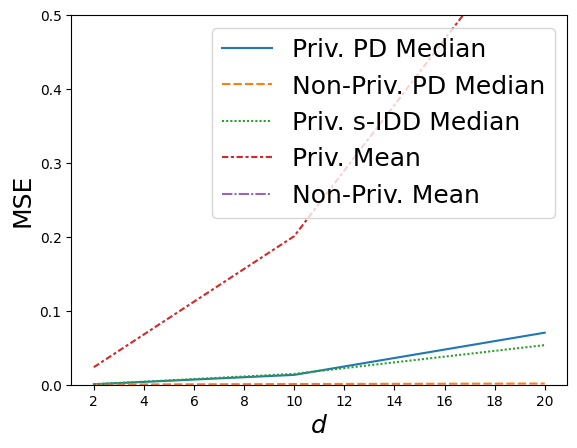

In [112]:
ax=sns.lineplot(data=mse_df[(mse_df['$\\epsilon$']==5) & (mse_df['Dist']=='heavy')],x=r'$d$',y="MSE",hue="Estimator", style="Estimator")
ax.set_ylim(0,0.5)

ax.legend(loc='upper right',fontsize=18)
ax.set_xlabel( r'$d$',fontsize=18)
ax.set_ylabel("MSE" ,fontsize=18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

fname="Heavy_Trimmed_MSE_Eps_5.png"
plt.savefig(fname,dpi=600, bbox_inches='tight')
plt.show()